In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report)
from matplotlib.colors import LinearSegmentedColormap
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline 

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("Datos/Transformados/clustering_final.csv", index_col='ID')

In [26]:
df.head()

,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Duracion,Ratio_Deuda_Ingresos,Estudios,...,Tipo_Jornada_Laboral_Autónomo,Tipo_Jornada_Laboral_Desempleado,Tipo_Jornada_Laboral_Jornada completa,Tipo_Jornada_Laboral_Tiempo parcial,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero,Riesgo_Jornada,Riesgo_Estado_Civil,Cluster_KMeans
ID,,,,,,,,,,,,,,,,,,,,,
S97R7X,18,16000,5000,397,19,1,8.06,48,0.10,0,...,1,0,0,0,0,0,1,0.116407,0.173672,1
RLGTBY,50,62116,37278,486,217,3,21.96,12,0.55,1,...,0,0,0,1,1,0,0,0.122506,0.101507,2
SKE2P9,37,37602,44532,765,150,3,11.20,60,0.23,1,...,0,0,0,1,1,0,0,0.122506,0.101507,0
E2FB1D,56,67410,23752,643,369,1,21.24,24,0.18,1,...,1,0,0,0,1,0,0,0.116407,0.101507,0
TKSCGH,35,35930,28440,645,136,3,16.95,12,0.55,1,...,0,0,1,0,0,0,1,0.097367,0.173672,2


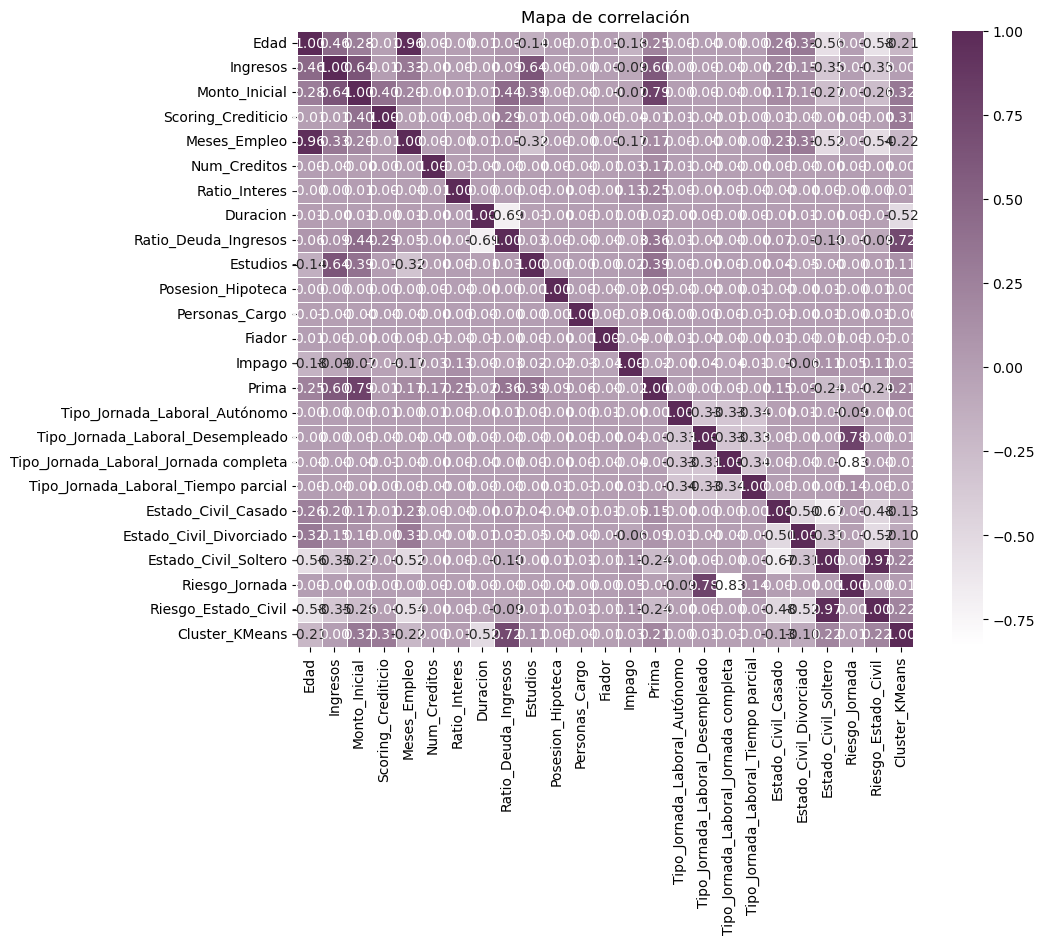

In [27]:
corr = df.corr(numeric_only=True)

lagun_cmap = LinearSegmentedColormap.from_list(
    "lagun_white_purple",
    ["#FFFFFF", "#5B2A57"])

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=lagun_cmap,
    square=True,
    linewidths=0.5)
plt.title("Mapa de correlación")
plt.show()

In [28]:
df.columns

Index(['Edad', 'Ingresos', 'Monto_Inicial', 'Scoring_Crediticio',
       'Meses_Empleo', 'Num_Creditos', 'Ratio_Interes', 'Duracion',
       'Ratio_Deuda_Ingresos', 'Estudios', 'Posesion_Hipoteca',
       'Personas_Cargo', 'Fiador', 'Impago', 'Prima',
       'Tipo_Jornada_Laboral_Autónomo', 'Tipo_Jornada_Laboral_Desempleado',
       'Tipo_Jornada_Laboral_Jornada completa',
       'Tipo_Jornada_Laboral_Tiempo parcial', 'Estado_Civil_Casado',
       'Estado_Civil_Divorciado', 'Estado_Civil_Soltero', 'Riesgo_Jornada',
       'Riesgo_Estado_Civil', 'Cluster_KMeans'],
      dtype='object')

In [29]:
x = df.drop(columns=['Impago','Prima'])
y = df['Impago']

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.30,
    random_state=8,
    shuffle=True,
    stratify=y)

In [30]:
# # PCA
# num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns

# scaler = MinMaxScaler()
# x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
# x_test[num_cols] = scaler.transform(x_test[num_cols])

# pca = PCA()
# X_train_pca = pca.fit_transform(x_train)

# explained_variance = np.cumsum(pca.explained_variance_ratio_)
# for i, v in enumerate(explained_variance):
#     print(f"Componentes {i+1}: {v:.4f}")

# pca = PCA(n_components=0.90)
# X_train_pca = pca.fit_transform(x_train)
# X_test_pca = pca.transform(x_test)

# print("Número de componentes finales:", pca.n_components_)

# x_train = pd.DataFrame(
#     X_train_pca,
#     columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])],
#     index=x_train.index)

# x_test = pd.DataFrame(
#     X_test_pca,
#     columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])],
#     index=x_test.index)

# Modelos sin SMOTE

## Regresion Logistica

Mejores parámetros: {'selector__k': 80, 'logistic__penalty': 'l1', 'logistic__C': 0.01}
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     13442
           1       0.20      0.66      0.30      1812

    accuracy                           0.64     15254
   macro avg       0.56      0.65      0.53     15254
weighted avg       0.85      0.64      0.70     15254



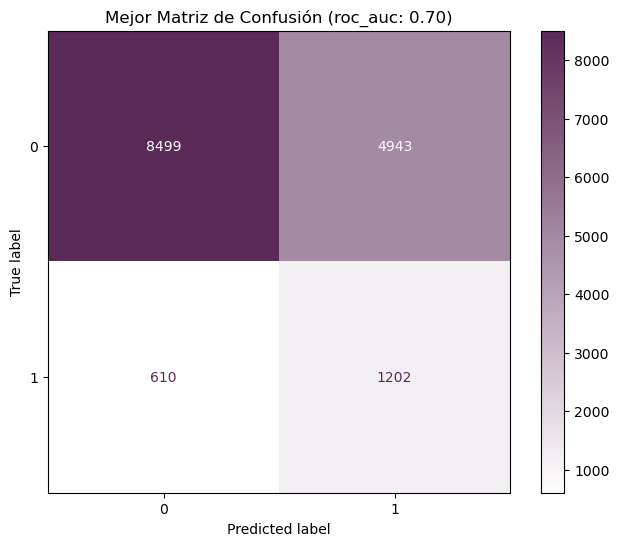

In [32]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),    
    ('selector', SelectKBest(score_func=f_classif)),
    ('logistic', LogisticRegression(solver='liblinear', class_weight='balanced'))])

parametros = {
    'logistic__C': [0.01, 0.1, 1, 10],  
    'logistic__penalty': ['l1', 'l2'],
    'selector__k': [40, 60, 80, 92]}

modelo = RandomizedSearchCV(
    pipeline, 
    param_distributions=parametros, 
    n_iter=15, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_RegLog = {
    "modelo": "Regresion Logistica",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_RegLog)

## LDA

In [ ]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('lda', LinearDiscriminantAnalysis())])

parametros = {
    'selector__k': [40, 60, 90],
    'lda__solver': ['lsqr', 'eigen'], 
    'lda__shrinkage': ['auto', 0.1, 0.5, 0.9] }

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)

filas = []
fila_LDA = {
    "modelo": "LDA",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_LDA)

## Naive Bayes

Mejores parámetros: {'selector__k': 60, 'nb__var_smoothing': 0.0001}
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     13442
           1       0.22      0.39      0.28      1812

    accuracy                           0.77     15254
   macro avg       0.57      0.60      0.57     15254
weighted avg       0.83      0.77      0.79     15254



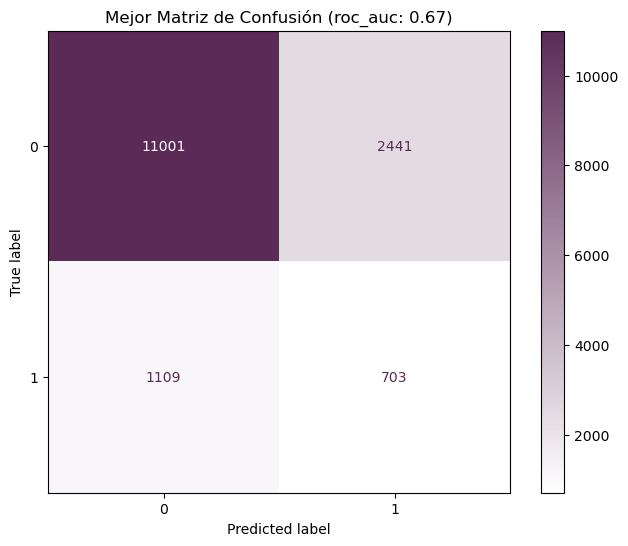

In [33]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('nb', GaussianNB())])

parametros = {
    'selector__k': [40, 60, 80, 92], 
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_NaiBay = {
    "modelo": "Naive Bayes",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_NaiBay)

## SVM

Mejores parámetros: {'svm__C': 10, 'selector__k': 40}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.20      0.66      0.30      1812

    accuracy                           0.64     15254
   macro avg       0.57      0.65      0.53     15254
weighted avg       0.85      0.64      0.70     15254



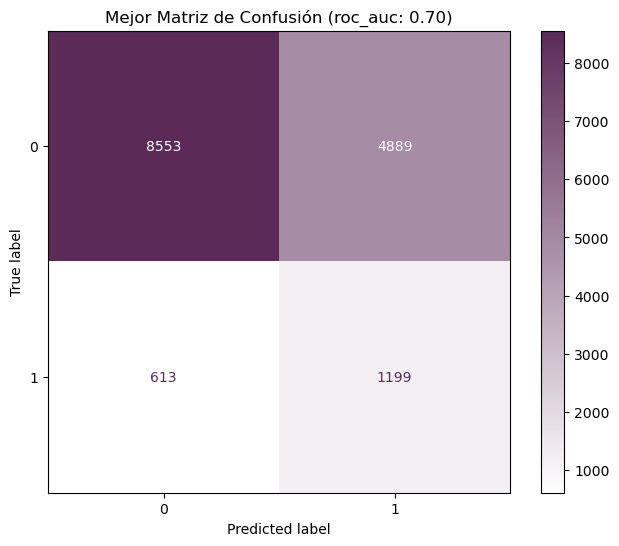

In [34]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('svm', LinearSVC(dual=False, max_iter=5000, class_weight='balanced', random_state=6))])

parametros = {
    'selector__k': [40, 60, 90],
    'svm__C': [0.01, 0.1, 1, 10]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_SVM = {
    "modelo": "SVM",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_SVM)

## Arbol de decision (gini)

Mejores parámetros: {'selector__k': 60, 'dt__min_samples_split': 20, 'dt__min_samples_leaf': 4, 'dt__max_depth': 5, 'dt__criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.19      0.61      0.29      1812

    accuracy                           0.64     15254
   macro avg       0.56      0.63      0.52     15254
weighted avg       0.84      0.64      0.70     15254



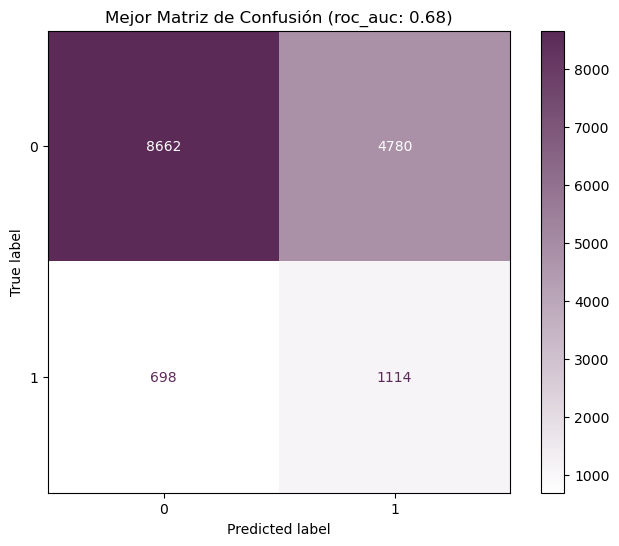

In [35]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['gini'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_gini = {
    "modelo": "Arbol de decision (gini)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_Arbol_gini)

## Arbol de decision (entropy)

Mejores parámetros: {'selector__k': 90, 'dt__min_samples_split': 5, 'dt__min_samples_leaf': 8, 'dt__max_depth': 5, 'dt__criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.19      0.61      0.29      1812

    accuracy                           0.64     15254
   macro avg       0.56      0.63      0.52     15254
weighted avg       0.84      0.64      0.70     15254



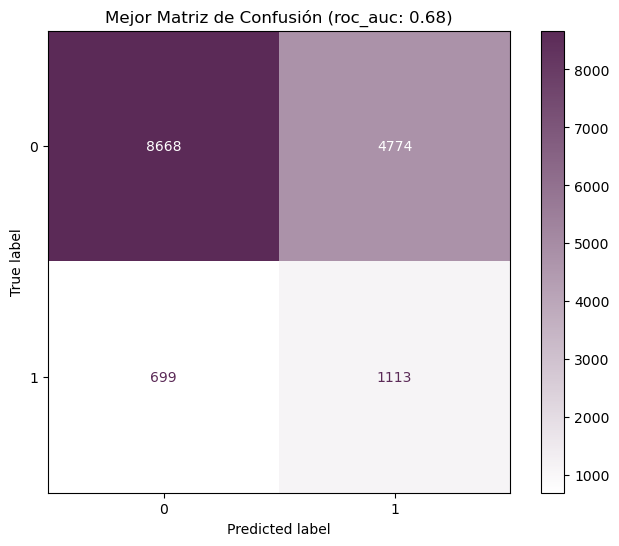

In [36]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['entropy'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_entropy = {
    "modelo": "Arbol de decision (entropy)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_Arbol_entropy)

## Arbol de decision (log_poss)

Mejores parámetros: {'selector__k': 90, 'dt__min_samples_split': 5, 'dt__min_samples_leaf': 8, 'dt__max_depth': 5, 'dt__criterion': 'log_loss'}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.19      0.61      0.29      1812

    accuracy                           0.64     15254
   macro avg       0.56      0.63      0.52     15254
weighted avg       0.84      0.64      0.70     15254



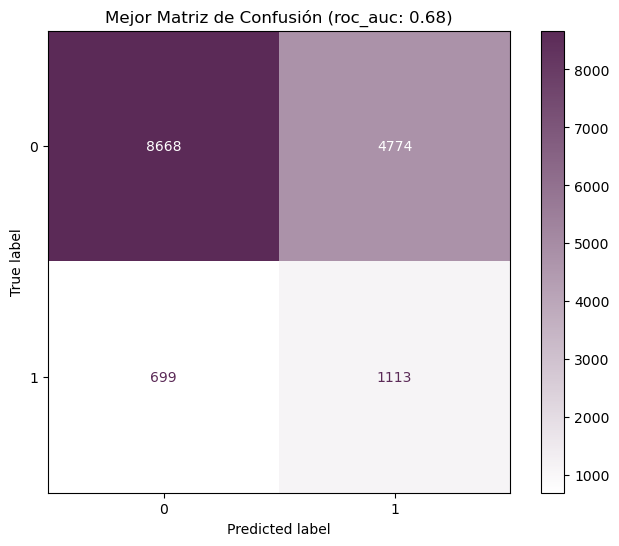

In [37]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['log_loss'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_log_poss = {
    "modelo": "Arbol de decision (log_poss)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_Arbol_log_poss)

# Modelos con NearMiss()

## Regresion Logistica

Mejores parámetros: {'selector__k': 92, 'nearmiss__version': 1, 'logistic__penalty': 'l2', 'logistic__C': 0.01}
              precision    recall  f1-score   support

           0       0.86      0.35      0.49     13442
           1       0.11      0.59      0.18      1812

    accuracy                           0.37     15254
   macro avg       0.48      0.47      0.34     15254
weighted avg       0.77      0.37      0.46     15254



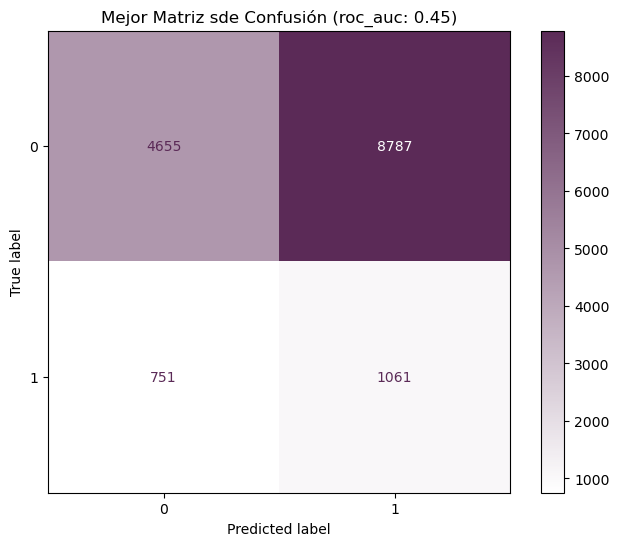

In [38]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)),
    ('nearmiss', NearMiss()),   
    ('logistic', LogisticRegression(solver='liblinear'))])

parametros = {
    'logistic__C': [0.01, 0.1, 1, 10],
    'logistic__penalty': ['l1', 'l2'],
    'selector__k': [40, 60, 80, 92],
    'nearmiss__version': [1]}

modelo = RandomizedSearchCV(
    pipeline,
    param_distributions=parametros,
    n_iter=15,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)

y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz sde Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_RegLog_Near = {
    "modelo": "Regresion Logistica (NearMiss)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_RegLog_Near)

## LDA

In [ ]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)),
    ('nearmiss', NearMiss()),
    ('lda', LinearDiscriminantAnalysis())])

parametros = {
    'selector__k': [40, 60, 90],
    'lda__solver': ['lsqr', 'eigen'], 
    'lda__shrinkage': ['auto', 0.1, 0.5, 0.9],
    'nearmiss__version': [1]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)

filas = []
fila_LDA_Near = {
    "modelo": "LDA (NearMiss)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_LDA_Near)

## Naive Bayes

In [ ]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('nearmiss', NearMiss()),
    ('nb', GaussianNB())])

parametros = {
    'selector__k': [40, 60, 80, 92], 
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4],
    'nearmiss__version': [1]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_NaiBay_Near = {
    "modelo": "Naive Bayes (NearMiss)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_NaiBay_Near)

## SVM

In [ ]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('nearmiss', NearMiss()),
    ('svm', LinearSVC(dual=False, max_iter=5000, class_weight='balanced', random_state=6))])

parametros = {
    'selector__k': [40, 60, 90],
    'svm__C': [0.01, 0.1, 1, 10],
    'nearmiss__version': [1]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_SVM_Near = {
    "modelo": "SVM (NearMiss)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_SVM_Near)

## Arbol de decision (giny)

In [ ]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('nearmiss', NearMiss()),
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['gini'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8],
    'nearmiss__version': [1]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_gini_Near = {
    "modelo": "Arbol de decision (NearMiss) (gini)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_Arbol_gini_Near)

## Arbol de decision (log_poss)

In [ ]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('nearmiss', NearMiss()),
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['log_poss'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8],
    'nearmiss__version': [1]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_gini_Near_log_poss = {
    "modelo": "Arbol de decision (NearMiss) (log_poss)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_Arbol_gini_Near_log_poss)

## Arbol de decision (entropy)

In [ ]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('nearmiss', NearMiss()),
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['entropy'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8],
    'nearmiss__version': [1]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_gini_Near_entropy = {
    "modelo": "Arbol de decision (NearMiss) (entropy)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_Arbol_gini_Near_entropy)

# Modelos con SMOTE

## Regresion Logistica

Mejores parámetros: {'selector__k': 80, 'logistic__penalty': 'l1', 'logistic__C': 0.01}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.20      0.65      0.30      1812

    accuracy                           0.64     15254
   macro avg       0.56      0.65      0.53     15254
weighted avg       0.84      0.64      0.71     15254



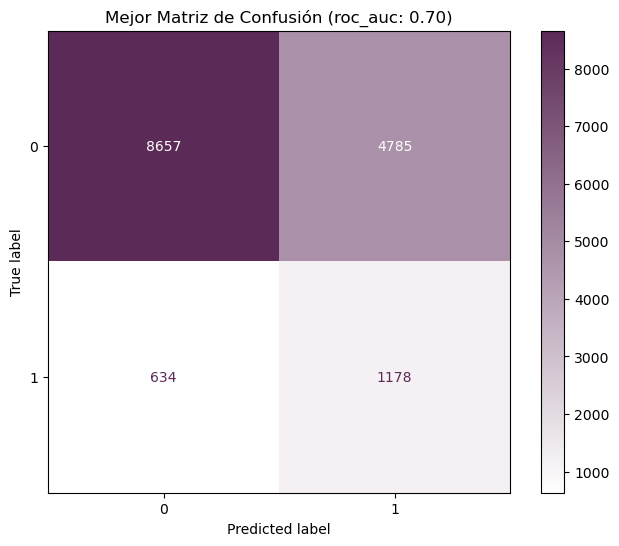

In [39]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),    
    ('smote', SMOTE(random_state=6)),
    ('selector', SelectKBest(score_func=f_classif)),
    ('logistic', LogisticRegression(solver='liblinear', class_weight='balanced'))])

parametros = {
    'logistic__C': [0.01, 0.1, 1, 10],  
    'logistic__penalty': ['l1', 'l2'],
    'selector__k': [40, 60, 80, 92]}

modelo = RandomizedSearchCV(
    pipeline, 
    param_distributions=parametros, 
    n_iter=15, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_RegLog_SMOTE = {
    "modelo": "Regresion Logistica (SMOTE)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_RegLog_SMOTE)

## LDA

Mejores parámetros: {'selector__k': 90, 'lda__solver': 'eigen', 'lda__shrinkage': 'auto'}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.20      0.66      0.31      1812

    accuracy                           0.64     15254
   macro avg       0.57      0.65      0.53     15254
weighted avg       0.85      0.64      0.71     15254



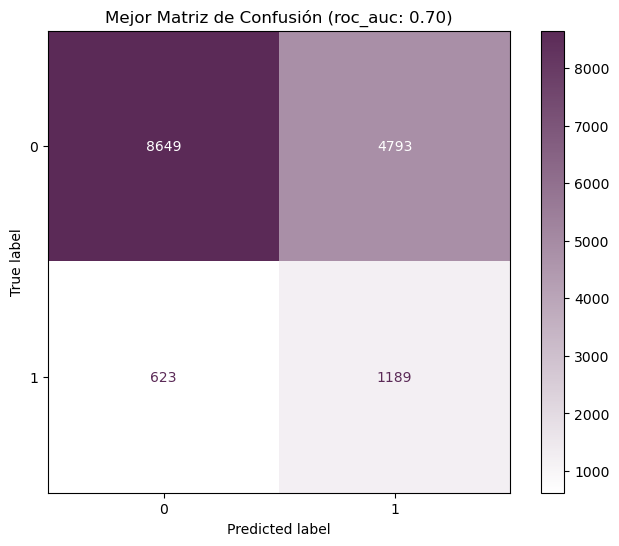

In [40]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('lda', LinearDiscriminantAnalysis())])

parametros = {
    'selector__k': [40, 60, 90],
    'lda__solver': ['lsqr', 'eigen'], 
    'lda__shrinkage': ['auto', 0.1, 0.5, 0.9] }

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_LDA_SMOTE = {
    "modelo": "LDA (SMOTE)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_LDA_SMOTE)

## Naive Bayes

Mejores parámetros: {'selector__k': 60, 'nb__var_smoothing': 0.0001}
              precision    recall  f1-score   support

           0       0.92      0.65      0.76     13442
           1       0.19      0.59      0.28      1812

    accuracy                           0.65     15254
   macro avg       0.55      0.62      0.52     15254
weighted avg       0.83      0.65      0.71     15254



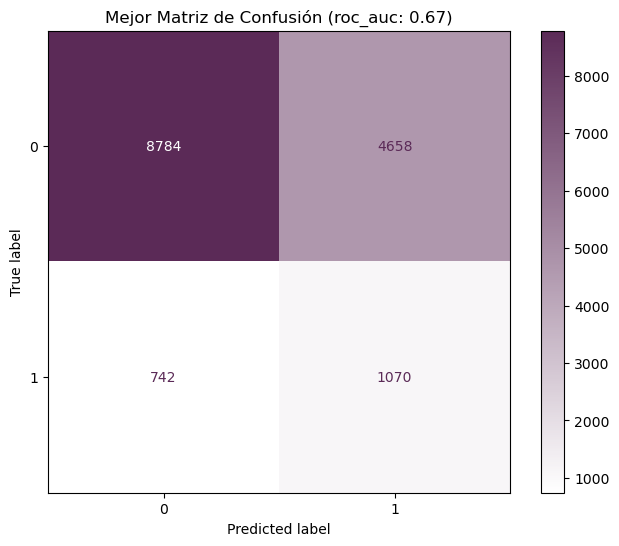

In [41]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('nb', GaussianNB())])

parametros = {
    'selector__k': [40, 60, 80, 92], 
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_NaiBay_SMOTE = {
    "modelo": "Naive Bayes (SMOTE)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_NaiBay_SMOTE)

## SVM

Mejores parámetros: {'svm__C': 1, 'selector__k': 40}
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     13442
           1       0.20      0.66      0.31      1812

    accuracy                           0.65     15254
   macro avg       0.57      0.65      0.53     15254
weighted avg       0.85      0.65      0.71     15254



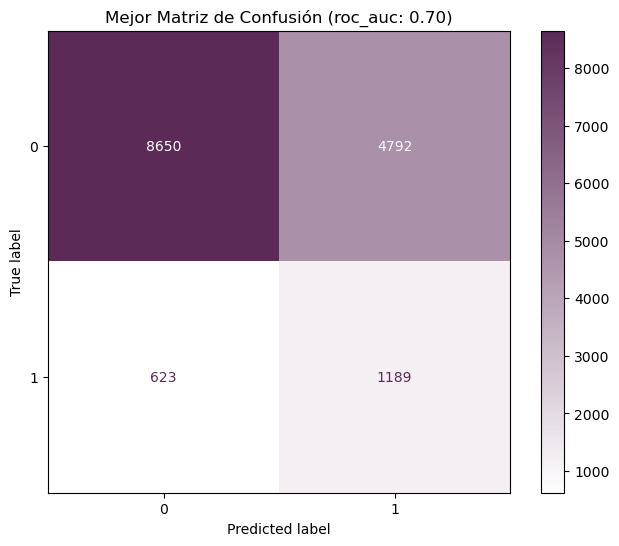

In [42]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('svm', LinearSVC(dual=False, max_iter=5000, class_weight='balanced', random_state=6))])

parametros = {
    'selector__k': [40, 60, 90],
    'svm__C': [0.01, 0.1, 1, 10]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_SVM_SMOTE = {
    "modelo": "SVM (SMOTE)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_SVM_SMOTE)

## Arbol de decision (gini)

Mejores parámetros: {'selector__k': 60, 'dt__min_samples_split': 20, 'dt__min_samples_leaf': 4, 'dt__max_depth': 5, 'dt__criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.91      0.79      0.84     13442
           1       0.21      0.44      0.29      1812

    accuracy                           0.74     15254
   macro avg       0.56      0.61      0.57     15254
weighted avg       0.83      0.74      0.78     15254



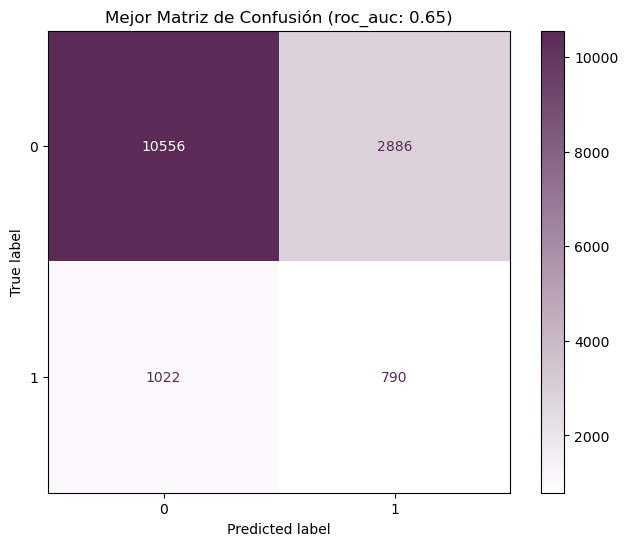

In [43]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['gini'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_SMOTE_gini = {
    "modelo": "Arbol de decision (SMOTE) (gini)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_Arbol_SMOTE_gini)

## Arbol de decision (entropy)

Mejores parámetros: {'selector__k': 60, 'dt__min_samples_split': 20, 'dt__min_samples_leaf': 4, 'dt__max_depth': 5, 'dt__criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     13442
           1       0.22      0.39      0.28      1812

    accuracy                           0.76     15254
   macro avg       0.56      0.60      0.57     15254
weighted avg       0.83      0.76      0.79     15254



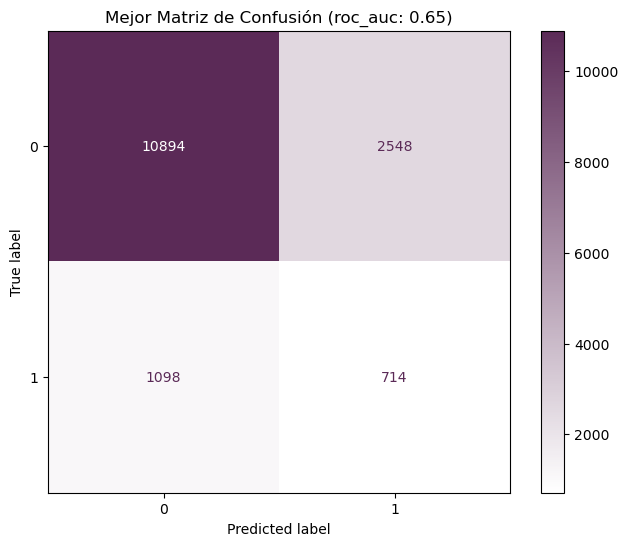

In [44]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['entropy'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_SMOTE_entropy = {
    "modelo": "Arbol de decision (SMOTE) (entropy)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_Arbol_SMOTE_entropy)

## Arbol de decision (log_poss)

Mejores parámetros: {'selector__k': 60, 'dt__min_samples_split': 20, 'dt__min_samples_leaf': 4, 'dt__max_depth': 5, 'dt__criterion': 'log_loss'}
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     13442
           1       0.22      0.39      0.28      1812

    accuracy                           0.76     15254
   macro avg       0.56      0.60      0.57     15254
weighted avg       0.83      0.76      0.79     15254



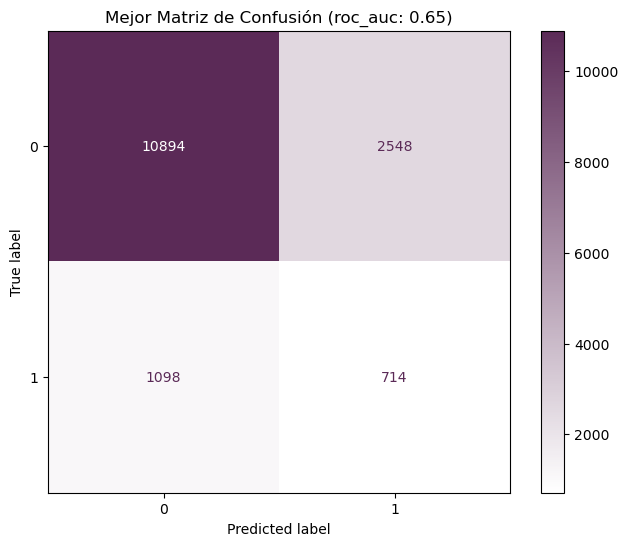

In [45]:
# ENTRENAMOS EL MEJOR MODELO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif)), 
    ('smote', SMOTE(random_state=6)),
    ('dt', DecisionTreeClassifier(random_state=6, class_weight='balanced'))])

parametros = {
    'selector__k': [40, 60, 90],
    'dt__criterion': ['log_loss'],
    'dt__max_depth': [5, 10, 15, 20], 
    'dt__min_samples_split': [5, 10, 20],
    'dt__min_samples_leaf': [2, 4, 8]}

modelo = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parametros,
    n_iter=20,
    cv=5,              
    scoring='roc_auc',
    n_jobs=-1,
    random_state=6)

modelo.fit(x_train, y_train)
y_pred = modelo.best_estimator_.predict(x_test)

# RESULTADOS
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.best_estimator_.classes_)

disp.plot(cmap=lagun_cmap, ax=ax, values_format='d')

plt.title(f'Mejor Matriz de Confusión (roc_auc: {modelo.best_score_:.2f})')

print(f"Mejores parámetros: {modelo.best_params_}")
print(classification_report(y_test, y_pred))
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
fila_Arbol_SMOTE_log_poss = {
    "modelo": "Arbol de decision (SMOTE) (log_poss)",
    "roc-auc": modelo.best_score_,
    "recall 1": report["1"]["recall"],
    "f1-score medio": report["macro avg"]["f1-score"]}

filas.append(fila_Arbol_SMOTE_log_poss)

# Resultados

In [46]:
resuldatos = pd.DataFrame(columns=[
    "modelo",
    "roc-auc",
    "recall 1",
    "f1-score medio"])

resuldatos = pd.concat(
    [resuldatos] + [pd.DataFrame([fila]) for fila in filas],
    ignore_index=True)

In [47]:
resuldatos = resuldatos.sort_values(by="roc-auc", ascending=False).round(3).reset_index(drop=True)

print(resuldatos.to_string(index=False))

                              modelo  roc-auc  recall 1  f1-score medio
                 Regresion Logistica    0.704     0.663           0.528
                                 SVM    0.704     0.662           0.530
         Regresion Logistica (SMOTE)    0.704     0.650           0.532
                         LDA (SMOTE)    0.704     0.656           0.533
                         SVM (SMOTE)    0.704     0.656           0.533
                                 LDA    0.703     0.000           0.468
         Arbol de decision (entropy)    0.677     0.614           0.525
        Arbol de decision (log_poss)    0.677     0.614           0.525
            Arbol de decision (gini)    0.675     0.615           0.524
                 Naive Bayes (SMOTE)    0.669     0.591           0.524
                         Naive Bayes    0.668     0.388           0.572
 Arbol de decision (SMOTE) (entropy)    0.647     0.394           0.569
Arbol de decision (SMOTE) (log_poss)    0.647     0.394         

# Devolver los resultados

In [48]:
# Mejor Modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),    
    ('selector', SelectKBest(score_func=f_classif)),
    ('logistic', LogisticRegression(solver='liblinear', class_weight='balanced'))])

parametros = {
    'logistic__C': [0.01, 0.1, 1, 10],  
    'logistic__penalty': ['l1', 'l2'],
    'selector__k': [40, 60, 80, 92]}

modelo = RandomizedSearchCV(
    pipeline, 
    param_distributions=parametros, 
    n_iter=15, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=6)

modelo.fit(x_train, y_train)

# Añadir al dataframe
df["probabilidad_impago"] = modelo.best_estimator_.predict_proba(df.drop(columns=['Impago', 'Prima']))[:, 1]

In [49]:
df.to_csv('Datos/Transformados/Datos_Porbabilidad_Impago.csv',index="ID")

In [50]:
# cluster.center 
# near miss